<div style="border:solid Purple 2px; padding: 40px">

<b>Привет, Полина!👋

Меня зовут Эльвира, я буду ревьюером твоего проекта. Предлагаю общаться на «ты», но если это не удобно - дай мне знать, и мы перейдем на «вы».


Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:


<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Такими комментариями я буду помечать отлично проделаную работу😉
</div>
    
<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
В таких комментариях я постараюсь подсказать тебе более элегантное или легкое решение, некоторые хитрости и фишки. Части проекта, помеченные такими комментариями, можно не исправлять, но рекомендую обратить на них внимание.</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>
    
В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Если ты видишь такой комментарий, значит здесть есть недочет, который следует исправить.
</div>

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница🙃
    
`<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>`

Чтобы сделать подобный блок, кликни здесь дважды и скопируй всю предыдущую строку ;)
    
Пожалуйста, не удаляй и не перемещай мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.</div></b>

# Проект: Принятие решений в бизнесе

#### Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

#### Описание данных

**Данные для первой части**

Файл **/datasets/hypothesis.csv.**:

**Hypothesis** — краткое описание гипотезы;

**Reach** — охват пользователей по 10-балльной шкале;

**Impact** — влияние на пользователей по 10-балльной шкале;

**Confidence** — уверенность в гипотезе по 10-балльной шкале;

**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл **/datasets/orders.csv.**:

**transactionId** — идентификатор заказа;

**visitorId** — идентификатор пользователя, совершившего заказ;

**date** — дата, когда был совершён заказ;

**revenue** — выручка заказа;

**group** — группа A/B-теста, в которую попал заказ.

Файл **/datasets/visitors.csv.**: 

**date** — дата;

**group** — группа A/B-теста;

**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста


#### Цели

1. Загрузить данные
2. Подготовить данные к анализу
3. Построить графики и описать их
4. Расчитать статистическую значимость
5. Провести A/B тест
6. Принять решение на основании результатов теста.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Очень здорово, что ты начинаешь проект с такого подробного введения, так держать!
</div>

## Часть 1. Приоритизация гипотез

Описание задания:

В файле **/datasets/hypothesis.csv** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort

**Задачи**

1. Примените фреймворк **ICE** для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

2. Примените фреймворк **RICE** для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

3. Укажите, как изменилась приоритизация гипотез при применении **RICE** вместо **ICE**. Объясните, почему так произошло.


### Предобработка данных

#### Импортируем данные

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Молодец, что загружаешь все библиотеки в начале проекта. Так сложней случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель отчета сразу поймет, какие библиотеки ты используешь и какие ему нужно установить для запуска проекта.

</div>

In [3]:
try:
    hypothesis  = pd.read_csv('hypothesis.csv')
except:
    hypothesis  = pd.read_csv('/datasets/hypothesis.csv')

#### Изучаем информацию

<u>Зададим функцию для более удобного изучения информации</u>

In [4]:
def first (df):
    print('          Первые строки          ')
    display(df.head())
    print('          Информация          \n')
    display(df.info())
    print('          Статистика          ')
    display(df.describe())
    print('          Пропуски          \n')
    display(df.isna().sum())
    print('\n          Дубликаты          \n')
    if df.duplicated().sum() > 0:
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликаты не обнаружены')
first(hypothesis)

          Первые строки          


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


          Информация          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

          Статистика          


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


          Пропуски          



Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


          Дубликаты          

Дубликаты не обнаружены


<u>Нужно привести имена столбцов к нижнему. Изменять формат столбцов не требуется.</u>

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Здорово, что используешь функцию для знакомства.
</div>

#### Приводим имена столбцов к нижнему регистру

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<u>Имена столбцов изменились верно.</u>

#### Выведем гипотезы

In [7]:
pd.options.display.max_colwidth = 150
hypothesis.hypothesis

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

**Вывод :**

Изучили информацию по датафрейму. Проверили наличие дубликатов и пропусков. Привели названия столбцов у нижнему регистру. Вывели гипотезы.

### Применяем фреймворк ICE для приоритизации гипотез.

#### Расчитаем ICE и отсортируем по убыванию

In [8]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'],2)  

In [9]:
hypothesis.sort_values(by='ice', ascending=False)  

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**Вывод:**

В топе находится восьмая гипотеза **"Запустить акцию, дающую скидку на товар в день рождения"**
Так же такие гипотезы как **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	"** и **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*""

### Применяем фреймворк RICE для приоритизации гипотез.

#### Расчитаем RICE и отсортируем по убыванию

In [10]:
hypothesis['rice'] = hypothesis['ice'] * hypothesis['reach'] 
hypothesis.sort_values(by='rice', ascending=False)  

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


**Вывод:**

В топе находится седьмая гипотеза **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**
Так же такие гипотезы как **"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"** и **"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"**

Оба топа объединяет <u>седьмая гипотеза</u>.

### Опишем как изменилась приоритизация гипотез при применении RICE вместо ICE.

На данных примерах убедились как влияют параметры на приоритизацию гипотез. Обратно <u>пропорционально</u> влияет показатель **efforts**, то есть чем он меньше тем лучше. Показатели **impact**, **сonfidence** и **reach** влияют <u>прямопропорционально</u>.

Гипотезу для большого охвата пользователей выбираем с помощью **RICE**, если большой охват не так сильно важен и требуется объективная оценка выбираем **ICE**.

Для проведения A/B теста лучше выбрать гипотезу под номером семь **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**. Приоритизация изменилась так как параметр **reach** оказался выше по феймворку **RICE**. 

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Приоритизация гипотез проведена успешно! Молодец, что выводишь таблицу дважды, каждый раз с сортировкой по одному из фреймоврков, так различия в их работе будут максимально наглядными. Согласна с твоими выводами по поводу их различия.

## Часть 2: Анализ A/B-теста

**Описание задания:**

Вы провели A/B-тест и получили результаты, которые описаны в файлах **/datasets/orders.csv** и **/datasets/visitors.csv.**

**Задачи:**

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Примите решение по результатам теста и объясните его. Варианты решений:**

   1. Остановить тест, зафиксировать победу одной из групп.
   2. Остановить тест, зафиксировать отсутствие различий между группами.
   3. Продолжить тест.

### Предобработка данных

#### Импортируем данные

In [11]:
try:
    orders  = pd.read_csv('orders.csv')
    visitors  = pd.read_csv('visitors.csv')
except:
    orders  = pd.read_csv('/datasets/orders.csv')
    visitors  = pd.read_csv('/datasets/visitors.csv')

#### Изучаем информацию

In [12]:
first(orders)

          Первые строки          


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


          Информация          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

          Статистика          


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


          Пропуски          



transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


          Дубликаты          

Дубликаты не обнаружены


<u>В двух столбцах отделим "Id" для удобства чтения. Формат даты определён неверно, заменим его.</u>

In [13]:
first(visitors)

          Первые строки          


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


          Информация          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

          Статистика          


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


          Пропуски          



date        0
group       0
visitors    0
dtype: int64


          Дубликаты          

Дубликаты не обнаружены


<u>Формат даты определён неверно, также заменим его.</u>

In [14]:
orders.columns = orders.columns.str.replace('Id', '_id') 
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

In [18]:

display(visitors.group.unique())
display(orders.group.unique())
print(orders['visitor_id'].nunique())

Мы обладаем данными по заказам за период с 2019-08-01 00:00:00 по 2019-08-31 00:00:00.
Мы обладаем данными по пользователям за период с 2019-08-01 00:00:00 по 2019-08-31 00:00:00.


array(['A', 'B'], dtype=object)

array(['B', 'A'], dtype=object)

1031


In [ ]:
#Определение периода
#print(orders['date'].min(), orders['date'].max())
#print(visitors['date'].min(), visitors['date'].max())
#Мы ообладаем данными за период с 2019-08-01 00:00:00 по 2019-08-31 00:00:00
#Количество уникальных пользователей
#print(orders['visitor_id'].nunique())
#Количество пользователей в каждой из групп
#group_a=orders.query('group == "A"') 
#group_b=orders.query('group == "B"')
#Проверка не попали ли пользователи в другую группу
#group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
#len(group_intersections)

**Вывод:** 
Изучили информацию по датафреймам. Проверили наличие дубликатов и пропусков. Изменили названия столбцов. Изменили форматы некоторых столбцов к типу date.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 <a class="tocSkip"> </h2>

Блок предобработки выполнен хорошо:  названия  и типы скорректированы, есть проверка на пропуски и дубликаты, молодец)
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Можно провести дополнительные исследования, например: 
    
* Посмотреть сколько у нас групп в АВ-тесте;
* Изучить временной интервал, узнав даты начала и окончания теста;
* Рассмотреть количество пользователей в каждой группе - по таблице с заказами;
* Посмотреть не попадают ли какие-то пользователи в обе группы - по таблице с заказами.
* Посмотреть динамику посетителей по дням по группам (visitos).
</div>

#### Строим график кумулятивной выручки по группам.

<u>Создадим датафреймы с агрегироваными кумулятивными данными для каждой из таблиц.</u>

In [21]:
groups = orders[['date', 'group']].drop_duplicates()  

orders_agg = groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }),axis=1,).sort_values(by=['date', 'group'])
 
visitors_agg = groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({
        'date': 'max',
        'group': 'max', 
        'visitors': 'sum'
    }),axis=1,).sort_values(by=['date', 'group']) 

display(orders_agg.head()) 
display(visitors_agg.head())  

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


<u>Объединим полученные таблицы в одну по столбцым даты и группы.</u>

In [22]:
cumulative = orders_agg.merge(
    visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',] 

cumulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [23]:
print(cumulative['date'].min(), cumulative['date'].max())

2019-08-01 00:00:00 2019-08-31 00:00:00


<u>Дата совпадает с датой в исходных данных,  следовательно датафрейм был создан верно</u>

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Можно проверить, корректно ли был содан датафрейм cummulativeData. Например, совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных. </div>   

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

👍

<u>Построим график.</u>

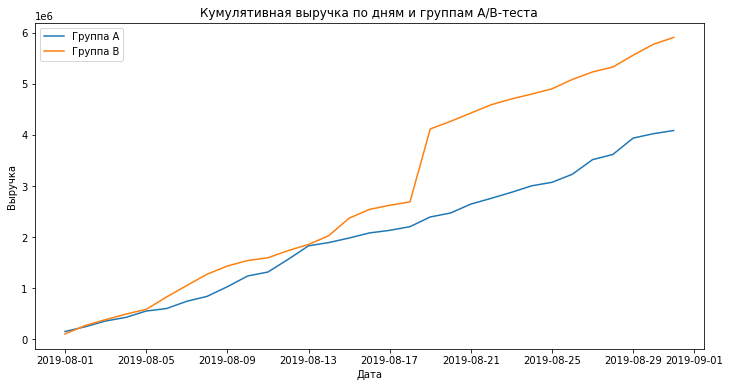

In [16]:
plt.figure(figsize=(12,6))  

cumulative_r_a = cumulative[cumulative['group']=='A'][['date','revenue', 'orders']]
cumulative_r_b = cumulative[cumulative['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulative_r_a['date'], cumulative_r_a['revenue'], label='A')
plt.plot(cumulative_r_b['date'], cumulative_r_b['revenue'], label='B')

plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам A/B-теста')
plt.show() 

**Вывод:** 
По графику можно увидеть, что <u>группа B</u> лидирует за всё время. 
С 18 по 19 августа произошёл резкий скачок, что может означать дорогой аномальный заказ или просто было много заказов.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Верно)
</div>

#### Строим график кумулятивного среднего чека по группам.

<u>Рассчитаем средний чек для каждой группы и построим графики.</u>

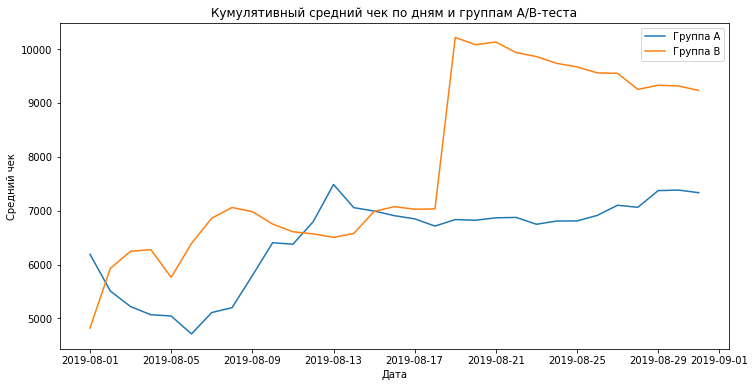

In [17]:
plt.figure(figsize=(12,6))   

plt.plot(cumulative_r_a['date'], cumulative_r_a['revenue']/cumulative_r_a['orders'], label='A')
plt.plot(cumulative_r_b['date'], cumulative_r_b['revenue']/cumulative_r_b['orders'], label='B')
plt.legend()  

plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-теста')
plt.show()  

**Вывод:**
По графикам можно наблюдать нестабильность графика в первой половине теста. В период с 18 по 19 агуста так же наблюдаем аномальный скачок в группе B. К концу графика средний чек у группы B выше, но так же можно заметить, что средний чек у группы A стал расти, а у группы B снижаться.

#### Строим график относительного изменения кумулятивного среднего чека группы B к группе A.

<u>Объединим данные в один датафрейм по столбцу даты.</u>

In [18]:
m_revenue = cumulative_r_a.merge(
    cumulative_r_b, 
    left_on='date', right_on='date', 
    how='left',
    suffixes=['_a', '_b'])

m_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


<u> Построим график.</u>

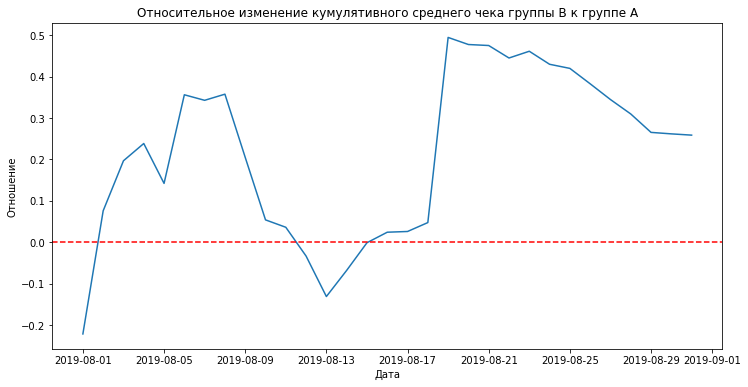

In [19]:
plt.figure(figsize=(12,6))   

plt.plot(
    m_revenue['date'],
    (m_revenue['revenue_b']/m_revenue['orders_b'])/(m_revenue['revenue_a']/m_revenue['orders_a'])-1)

plt.axhline(y=0, color='red', linestyle='--')   
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show() 

**Вывод:** 
На графике наблюдаем резкие скачки, возможно аномальные заказы были сделаны в пиковые дни.

#### Строим график кумулятивного среднего количества заказов на посетителя по группам.

<u> Посчитаем конверсию. Построим график.</u>

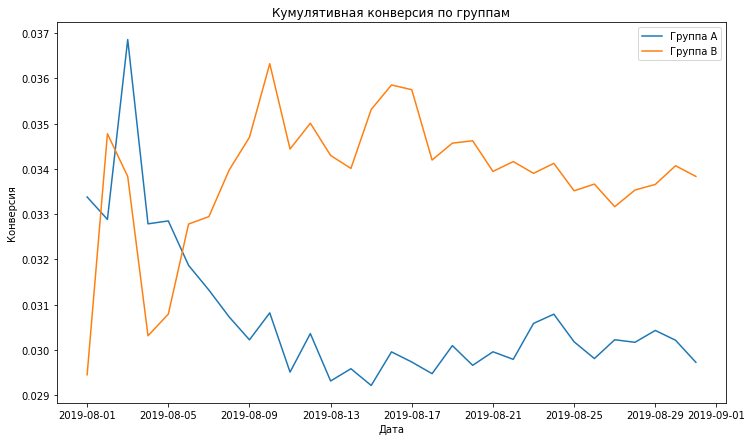

In [20]:
cumulative['conversion'] = cumulative['orders']/cumulative['visitors']

cumulative_a = cumulative[cumulative['group']=='A']
cumulative_b = cumulative[cumulative['group']=='B']

plt.figure(figsize=(12,7))   

plt.plot(cumulative_a['date'], cumulative_a['conversion'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['conversion'], label='B')

plt.legend(['Группа А', 'Группа B']) 

plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('Кумулятивная конверсия по группам')
plt.show()  

**Вывод:**
В первые дни конверсия группы A выше, но затем начала стремительно падать. Конверсия группы A 0.29-0.30, группы B 0.33-0.36. На данный момент гипотеза подтверждается.

#### Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

<u>Объединим таблицы в один датафрейм</u>

In [21]:
m_сonversion = cumulative_a[['date','conversion']].merge(
    cumulative_b[['date','conversion']], 
    left_on='date',
    right_on='date', 
    how='left',
    suffixes=['_a', '_b'])

m_сonversion.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


<u>Построим график</u>

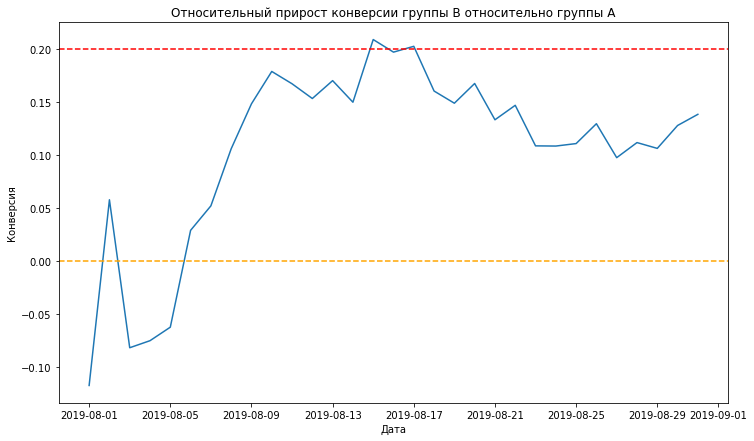

In [22]:
plt.figure(figsize=(12,7))   

plt.plot(m_сonversion['date'],
         m_сonversion['conversion_b']/
         m_сonversion['conversion_a']-1,)

plt.axhline(y=0, color='orange', linestyle='--')  
plt.axhline(y=0.2, color='red', linestyle='--') 

plt.ylabel('Конверсия') 
plt.xlabel('Дата') 
plt.title('Относительный прирост конверсии группы B относительно группы A') 
plt.show()

**Вывод:**
По графику видно, что сначала конверсия была нестабильна. Затем с 5 по 10 август значительно выросла и превысила 20%. К концу теста конверсия находилась в пределах 9-15%.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Графики построены и интерпретированы верно, молодец)
</div>

#### Строим точечный график стоимостей заказов.

<u>Создадим сводную таблицу с заказами для каждого пользователя.</u>

In [23]:
orders_count = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'}))

orders_count.columns = ['user_id', 'orders']
orders_count.sort_values(by='orders', ascending=False).head(10) 

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


<u>Построим точечную диаграмму.</u>

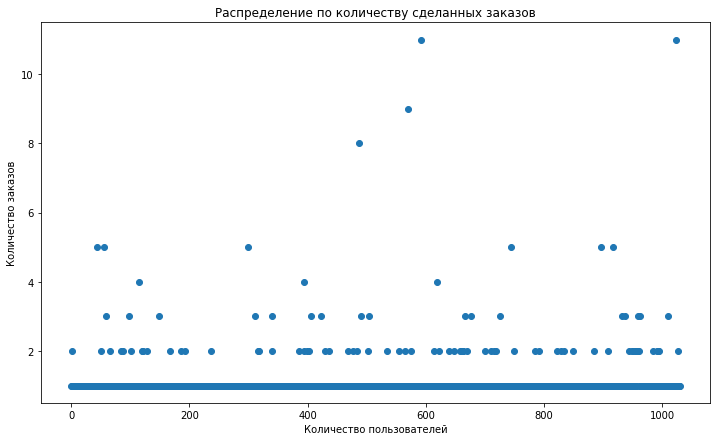

In [24]:
x_values = pd.Series(range(0, len(orders_count))) 
plt.figure(figsize=(12,7)) 

plt.scatter(x_values, orders_count['orders'])  

plt.ylabel('Количество заказов') 
plt.xlabel('Количество пользователей') 
plt.title('Распределение по количеству сделанных заказов') 
plt.show() 

**Вывод:** Чаще всего встречаются пользователи, сделавшие 1-2 заказа. Есть уникальные пользователи, сделавшие от 8 до 11 заказов. Таких пользователей мы отсеем для более точного представления. 

#### Считаем 95-й и 99-й перцентили количества заказов на пользователя.  Определяем границу для определения аномальных пользователей.

In [25]:
print(np.percentile(orders_count['orders'], [95, 99])) 

[2. 4.]


**Больше двух заказов совершили не более 5% пользователей. Около одного процента совершили больше четырёх заказов.**


<u>Создадим переменную с границой колличества заказов.</u>

In [26]:
m_orders = 3 
#print(np.percentile(orders_count['orders'], [95, 97.5, 99])) 
#m_orders  = np.percentile(orders_count['orders'], 97.5)
#many_orders = pd.concat(
#    [orders_u_a[orders_u_a['orders'] > m_orders]['visitors_id'],
#       orders_u_b[orders_u_b['orders'] > m_orders]['visitors_id'],],
#    axis=0,)

#### Считаем точечный график стоимостей заказов.

<u>Отсортируем значения, и выведем их на экран.</u>

In [27]:
orders[['visitor_id', 'revenue']].sort_values(by='revenue', ascending=False).head(10) 

,visitor_id,revenue
425,1920142716,1294500
1196,2108080724,202740
858,1316129916,93940
1136,1307669133,92550
744,888512513,86620
682,4266935830,78990
662,4266935830,78990
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710


<u>Построим точечный график</u>

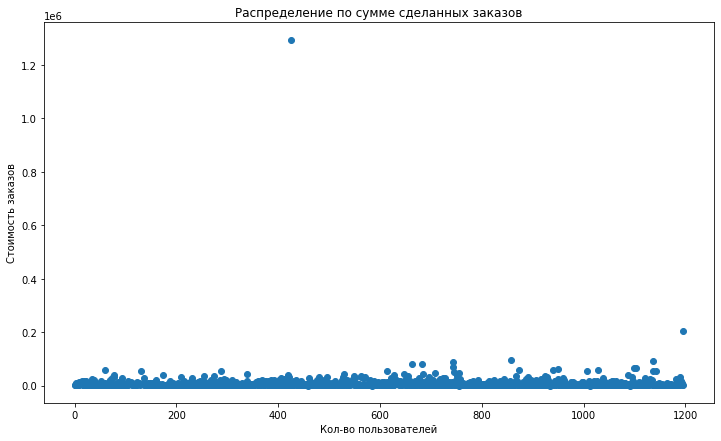

In [28]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12,7)) 

scattter_plot = plt.scatter(x_values, orders['revenue'])  

plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show() 

<u>По такому графику сложно сделать выводы, т.к. есть значения сильно превосходящие остальные. Зададим лимит и снова построим график.</u>

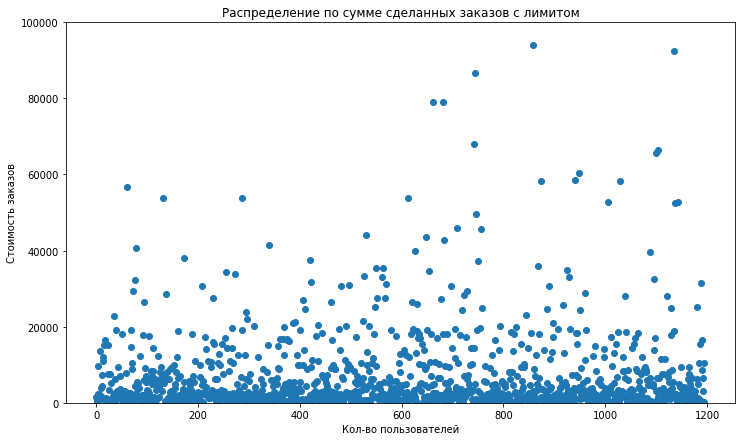

In [29]:
x_values = pd.Series(range(0, len(orders['revenue'])))
 
plt.figure(figsize=(12,7))

plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000) 

plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов с лимитом') 
plt.show()

**Вывод:**
Основное количество закзов находится в пределах до 20 тысяч. Всё еще не сожем выделить стоимость аномальных заказов, посмотрим через процентили.

#### Считаем 95-й и 99-й перцентили стоимости заказов. Определяем границу для определения аномальных заказов.

In [30]:
print(np.percentile(orders['revenue'], [95, 99]))  

[28000.  58233.2]


**Стоимость более 28 тысяч имеют не более 5% заказов. Около одного процента имеют стоимость более 58 тысяч.**

<u>Создадим переменную с границой стоимости заказов.</u>

In [30]:
e_order  = 30000
#print(np.percentile(orders['revenue'], [95, 97.5, 99])) 
#e_order  = np.percentile(orders['revenue'], 97.5)
#expensive_orders = orders[orders['revenue'] > e_order]['visitor_id']

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Чтобы в дальнейшем мы могли использовать анализ повторно, будет лучше отказаться от  ручного ввода обозначаемых границ, и заменить на соответствующие коду обозначения (перцентили))

</div>

#### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

<u>Посчитаем статистическую значимость различий с помощью теста Манна-Уинти. Но для этого нужно сначала подготовить данные.</u>

In [32]:
orders_u_a = orders[orders['group']=='A'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_u_a.columns=['visitors_id','orders']

orders_u_b = orders[orders['group']=='B'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_u_b.columns=['visitors_id','orders'] 

display(orders_u_a.head()) 
display(orders_u_b.head()) 

,visitors_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,visitors_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


<u>Зададим переменные, где пользователи без заказов - ноль, а пользователи с заказами, будут соответсвовать числу заказов.</u>

In [33]:
sample_a = pd.concat(
    [orders_u_a['orders'],
        pd.Series(0, 
                  index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_u_a['orders'])),
                  name='orders')], axis=0)
sample_b = pd.concat(
    [orders_u_b['orders'],
        pd.Series
        (0,index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(orders_u_b['orders'])),
         name='orders')], axis=0)

<u>Сформируем гипотезы.</u>

**Нулевая гипотеза**: Различий в конверсии нет

**Альтернативная гипотеза**: Различия в конверсиях есть


In [34]:
res_1 = stats.mannwhitneyu(sample_a, sample_b)[1] 

alpha = 0.05

print(f'Значение p-value : {res_1}')

if res_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средняя конверсия группы А: {:.1%}'.format(sample_a.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sample_b.mean()))  
print('Отношение конверсии В к А: {0:.2f}'.format(sample_b.mean()/sample_a.mean()-1))

Значение p-value : 0.016792355056752608
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 3.0%
Средняя конверсия группы B: 3.4%
Отношение конверсии В к А: 0.14


**Вывод:** **Отвергаем нулевую гипотезу**, значит различия в конверсиях присутствуют. Отношение A к B 14%, что является неплохим результатом относительного прироста. Группа B лидирует. 

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
Гипотезы сформулированы верно и значение p-value интерпретировано правильно. Хорошая работа.
</div>

#### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

<u>Сформируем гипотезы.</u>

**Нулевая гипотеза**: Различий в средних чеках нет

**Альтернативная гипотеза**: Различия в средних чеках есть

In [35]:
res_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  
alpha = 0.05
print(f'Значение p-value : {res_2}')

if res_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средний чек группы А: {:.1f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.1f}'.format(orders[orders['group']=='B']['revenue'].mean())) 
print('Отношение среднего чека B к A: {:.2f}'.format(orders[orders['group']=='B']['revenue']
                                                     .mean() / orders[orders['group']=='A']['revenue'].mean()-1)) 


Значение p-value : 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 7333.6
Средний чек группы B: 9230.9
Отношение среднего чека B к A: 0.26


**Вывод:** **Нулевая гипотеза не отвернута, различий в средних чеках нет.** Относительное различие среднего чека между сегментами около 26%.

#### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

<u>Используя ранее заданные переменные, посчитаем среднее колличество заказов по "очищенным" данным</u>

In [36]:
many_orders = pd.concat(
    [orders_u_a[orders_u_a['orders'] > m_orders]['visitors_id'],
        orders_u_b[orders_u_b['orders'] > m_orders]['visitors_id'],],
    axis=0,)

expensive_orders = orders[orders['revenue'] > e_order]['visitor_id']
 
anormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values())
print(anormal_users.head(5))
print('Кол-во аномальных пользователей: ', anormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
Кол-во аномальных пользователей:  57


<u>Уберём аномальные результаты</u>

In [37]:
sample_a_filtered = pd.concat(
    [orders_u_a[
            np.logical_not(orders_u_a['visitors_id'].isin(anormal_users))]['orders'],
        pd.Series(0,index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_u_a['orders'])),
            name='orders')],axis=0,)

sample_b_filtered = pd.concat(
    [orders_u_b[
            np.logical_not(orders_u_b['visitors_id'].isin(anormal_users))]['orders'],
        pd.Series(0,index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_u_b['orders'])
            ),name='orders')],axis=0,)  

**Ранее нулевая гипотеза была отвергнута, проверим будет ли тут так же.**

<u>Сформируем гипотезы.</u>

**Нулевая гипотеза**: Различий в конверсии нет

**Альтернативная гипотеза**: Различия в конверсиях есть

In [38]:
res_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 
alpha = 0.05

print(f'Значение p-value : {res_3}') 

if res_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Средняя конверсия (очищенные данные) группы А: {:.1%}'.format(sample_a_filtered.mean()))
print('Средняя конверсия (очищенные данные) группы B: {:.1%}'.format(sample_b_filtered.mean())) 
print('Отношение конверсии В к А, по очищенным данным: {0:.2f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))  

Значение p-value : 0.01831750089424907
Отвергаем нулевую гипотезу
Средняя конверсия (очищенные данные) группы А: 2.7%
Средняя конверсия (очищенные данные) группы B: 3.1%
Отношение конверсии В к А, по очищенным данным: 0.15


**Вывод:** Для "очищенных" данных всё так же остается, что **нулевая гипотеза отвергнута и различия в конверсиях есть**. Значения конаерсий уменьшились, а показатель среднего прироста вырос. Группа B всё еще лидирует. 

#### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

**Ранее мы не отвергли нулевую гипотезу, проверим можем ли мы принять ее для "очишенных" данных.**

<u>Сформируем гипотезы.</u>

**Нулевая гипотеза**: Различий в средних чеках нет

**Альтернативная гипотеза**: Различия в средних чеках есть

In [39]:
res_4 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(anormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(anormal_users)))]['revenue'])[1] 

mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(anormal_users)))]['revenue'].mean()
mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(anormal_users)))]['revenue'].mean() 
alpha = 0.05

print(f'Значение p-value : {res_4}')  
if res_4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средний чек группы А (очищенные данные): {:.1f}'.format(mean_revenue_b))
print('Средний чек группы B (очищенные данные): {:.1f}'.format(mean_revenue_a))
print('Отношение среднего чека В к А, по очищенным данным: {0:.2f}'.format(mean_revenue_b / mean_revenue_a)) 

Значение p-value : 0.9583231483662625
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А (очищенные данные): 5228.2
Средний чек группы B (очищенные данные): 5333.3
Отношение среднего чека В к А, по очищенным данным: 0.98


**Вывод:** **Нулевая гипотеза так же не отвергнута**. Статистическая значимость средних чеков "очищенных" данных так же равны, отношение практически равно единице, данные стали более точными.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Статистический анализ проведен верно)

#### Принимаем решение по результатам теста. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**По результатам A/B-тестирования можно сделать следующие выводы:**

   - Прибыль и средний чек неравномерно выросли.
   - Присутствует статистически значимое различие по конверсии между группами, как с "сырыми" данными, так и с "очищенными".
   - Статистически значимого различия по среднему чеку между группами нет.
   - По графику различия конверсии по группам, группа B (выше на 14%, после очищения 15%)имеет тенденцию к росту.
   - Средняя конверсия группы А: 3.0%, средняя конверсия группы B: 3.4%, отношение конверсии В к А: 0.14. Средняя конверсия (очищенная) группы А: 2.7%, средняя конверсия (очищенная) группы B: 3.1%, отношение конверсии В к А, по очищенным данным: 0.15
   - По графику различия среднего чека по группам к концу периода показывает что группа B имеет более высокие показатели (выше на 26%). Но после "очищения" показатели групп поравнялись(98%).
   - Средний чек группы А: 7333.6, средний чек группы B: 9230.9, отношение среднего чека B к A: 0.26. Средний чек группы А (очищенная): 5228.2, средний чек группы B (очищенная): 5333.3, отношение среднего чека В к А, по очищенным данным: 0.98
   - Разница конверсии между группами действительно присутствует, а не получена случайным образом, то есть количество заказов увеличилось, а средний чек остался прежним. Что означает рост выручки.

*На основании данных результатов, мы принимаем следующее решение:*

**Решение 1. Остановить тест, зафиксировать победу одной из групп.**

<u>Группа B более оказалась более успешна.</u>

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Верно)

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊 v_2<a class="tocSkip"> </h2>
    <br/>
Полина, спасибо за проект! Успехов в дальнейшем обучении!)
    

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊<a class="tocSkip"> </h2>
    <br/>
Полина, замечательная работа по проекту, отлично справилась с расчетами и графиками) Критических замечаний нет, возвращаю проект обратно, чтобы убедиться - все мои комментарии понятны.
    

    
 
**Желаю удачи и жду твой проект на повторное ревью! Если вдруг у тебя возникнут вопросы, то я с радостью отвечу на них.    😊**
    
<br>   
             
**Дополнительные материалы:**
 
[Вебинары под эгидой Практикума](https://vk.com/yandex.praktikum?w=wall-176471180_2144), 
    
[Лекции Анатолия Карпова 1](https://www.youtube.com/watch?v=jnFVmtaeSA0&list=WL&index=19&t=2s) [2](https://www.youtube.com/watch?v=gljfGAkgX_o&list=WL&index=4)
    
Материалы [gopractice](https://gopractice.ru/summary/)

Лекцию Карта статистических методов [Смотреть видео](https://www.youtube.com/watch?v=-zps6hm0nX8&t=1269s)
        
</div>